In [1]:
"""plot a histogram to show the relationship between secondary_ml predictions and pnl outcomes to help me decide where to set the score threshold"""

'plot a histogram to show the relationship between secondary_ml predictions and pnl outcomes to help me decide where to set the score threshold'

In [2]:
import pandas as pd
import json
from pprint import pprint
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime, timedelta

pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.precision', 4)

In [3]:
def make_df(data, start):
    rpnls = []
    for pos in data:
        if pos['signal'].get('score_ml') and pos['signal'].get('score_old'):
            score_ml = pos['signal']['score_ml']
            score_old = float(pos['signal']['score_old'])
            score_l = pos['signal']['confidence_l']
            score_s = pos['signal']['confidence_s']
            for t in pos['trade']:
                if t.get('rpnl'):
                    rpnls.append((t['timestamp']*1000000, 
                                  t['rpnl'], 
                                  round(score_ml, 4), 
                                  round(score_old, 4), 
                                  round(score_l, 4), 
                                  round(score_s, 4)
                                  ))
    df = pd.DataFrame(rpnls, columns=['timestamp', 'rpnl', 'score_ml', 'score_old', 'score_l', 'score_s']).sort_values('timestamp')
    # df['timestamp'] = pd.to_datetime(df.timestamp)
    
    # df = df.loc[df.timestamp > start].reset_index(drop=True)
    df = df.set_index('timestamp', drop=True)
    
    return df

In [10]:
name = 'trail_fractals'
tf = '1h'
settings = '5_2'
selection = '1w_volumes_100'

# agent = Path(f'/home/ross/coding/modular_trader/records/{name}_{tf}_None_{settings}_{selection}')

real = []
wanted_sim = []
unwanted = []
agents = Path('/home/ross/coding/modular_trader/records/').glob('*')
for agent in agents:
    # print(f"\nAnalysing {agent.parts}")
    
    if not agent.is_dir():
        continue
    
    with open(agent/'closed_trades.json', 'r') as file:
        real_data = json.load(file)
    with open(agent/'closed_sim_trades.json', 'r') as file:
        sim = json.load(file)
    
    real.extend(list(real_data.values()))
    wanted_sim.extend([cs for cs in sim.values() if cs['trade'][0]['wanted']])
    unwanted.extend([cs for cs in sim.values() if not cs['trade'][0]['wanted']])

wanted = real + wanted_sim
all = real + wanted_sim + unwanted
print(f"{len(all) = }")

start = datetime(year=2023, month=9, day=6)

df = make_df(all, start)
df

len(all) = 14624


,rpnl,score_ml,score_old,score_l,score_s
timestamp,,,,,
1696549200000000,-1.0000,0.0157,0.0006,0.5511,0.5175
1696554300000000,-1.0000,0.2910,0.0458,0.4896,0.4056
1696565700000000,-1.0000,0.2214,0.0000,0.4553,0.6143
1696568700000000,-1.0000,0.1681,0.0000,0.4261,0.4357
1696569000000000,-1.0000,0.1192,0.0033,0.4300,0.3527
1696574400000000,-0.7680,0.1077,0.0003,0.5201,0.4433
1696577100000000,-1.0000,0.1221,0.0315,0.4772,0.3744
1696580700000000,-1.0000,0.2576,0.0064,0.4980,0.3503
1696587000000000,-1.0000,0.2302,0.0031,0.4300,0.3503


In [8]:
"""i want to bin the values in the score_ml column and plot the median rpnl in each bin"""

'i want to bin the values in the score_ml column and plot the median rpnl in each bin'

(array([66., 40., 38., 36., 49., 44., 46., 54., 32., 21., 21., 35., 23.,
        19., 20., 13., 10., 15., 21.,  1.]),
 array([6.00000e-04, 5.35200e-02, 1.06440e-01, 1.59360e-01, 2.12280e-01,
        2.65200e-01, 3.18120e-01, 3.71040e-01, 4.23960e-01, 4.76880e-01,
        5.29800e-01, 5.82720e-01, 6.35640e-01, 6.88560e-01, 7.41480e-01,
        7.94400e-01, 8.47320e-01, 9.00240e-01, 9.53160e-01, 1.00608e+00,
        1.05900e+00]),
 <BarContainer object of 20 artists>)

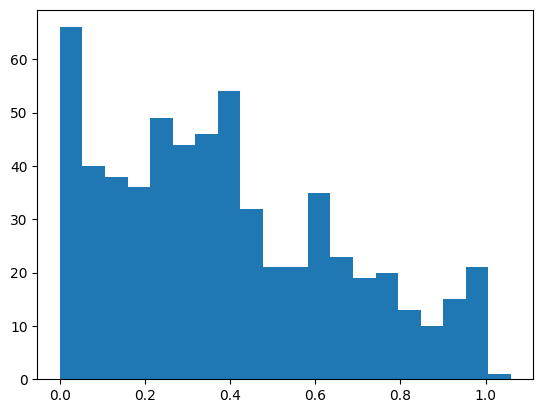

In [11]:
plt.hist(x=df.score_ml, bins=20, 
         # weights=df.rpnl, 
         cumulative=0)